### Invoice data

 - Client_id: Unique id for the client
 - Invoice_date: Date of the invoice
 - Tarif_type: Type of tax
 - Counter_number:
 - Counter_statue: takes up to 5 values such as working fine, not working, on hold statue, ect
 - Counter_code:
 - Reading_remarque: notes that the STEG agent takes during his visit to the client (e.g: If the counter shows something wrong, the agent gives a bad score)
 - Counter_coefficient: An additional coefficient to be added when standard consumption is exceeded
 - Consommation_level_1: Consumption_level_1
 - Consommation_level_2: Consumption_level_2
 - Consommation_level_3: Consumption_level_3
 - Consommation_level_4: Consumption_level_4
 - Old_index: Old index
 - New_index: New index
 - Months_number: Month number
 - Counter_type: Type of counter

In Tunisia, the Société Tunisienne de l'Électricité et du Gaz (STEG) calculates electricity bills using a tiered tariff system, where the cost per kilowatt-hour (kWh) increases as consumption rises. This progressive structure is designed to encourage energy conservation by charging higher rates for higher usage.

 - Low-Voltage (LV) Tariff Categories:

STEG's LV customers are divided into two main categories based on their contracted power and monthly consumption:

 - Economic Category:

Applicable to: Customers with a contracted power supply of 1 or 2 kilovolt-amperes (kVA) and monthly consumption up to 200 kWh.
 - Billing Structure: Consumption is billed in progressive tranches:
    - 1–50 kWh
    - 51–100 kWh
    - 101–200 kWh

 - Normal Category:

Applicable to: Customers with a contracted power supply greater than 2 kVA or those with consumption exceeding 200 kWh per month.
Billing Structure: Consumption is billed in progressive tranches:
    
   - 1–200 kWh
   - 201–300 kWh
   - 301–500 kWh
   - Above 500 kWh

 - Energy Pricing (as per available data):

 - Economic Category:

 - Residential:
   - 1–50 kWh: 0.022 USD/kWh
   - 51–100 kWh: 0.035 USD/kWh
   - 101–200 kWh: 0.059 USD/kWh
 - Non-Residential:
   - 1–50 kWh: 0.0322 USD/kWh
   - 51–100 kWh: 0.035 USD/kWh
   - 101–200 kWh: 0.059 USD/kWh
 - Normal Category:

   - Residential:
      - 1–200 kWh: 0.059 USD/kWh
      - 201–300 kWh: 0.073 USD/kWh
      - 301–500 kWh: 0.114 USD/kWh
      - Above 500 kWh: 0.139 USD/kWh
   - Non-Residential:
      - 1–200 kWh: 0.065 USD/kWh
      - 201–300 kWh: 0.081 USD/kWh
      - 301–500 kWh: 0.117 USD/kWh
      - Above 500 kWh: 0.131 USD/kWh
Note: These rates are based on data available up to 2021. For the most current tariff information, please consult STEG's official resources.

Example Calculation:

For a residential customer in the Normal Category consuming 350 kWh in a month:

First 200 kWh: 200 kWh × 0.059 USD/kWh = 11.80 USD
Next 100 kWh: 100 kWh × 0.073 USD/kWh = 7.30 USD
Remaining 50 kWh: 50 kWh × 0.114 USD/kWh = 5.70 USD
Total Energy Charge: 11.80 + 7.30 + 5.70 = 24.80 USD

This tiered approach ensures that as consumption increases, the cost per unit also rises, promoting efficient energy use.

For the most accurate and up-to-date information on tariff structures and rates, it's advisable to refer to STEG's official communications or contact their customer service directly.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
#import lightgbm
#from lightgbm import LGBMClassifier

import warnings

In [4]:
invoice_train = pd.read_csv(f'data/invoice_train.csv', low_memory=False)

In [5]:
invoice_train.head()

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,ELEC
1,train_Client_0,2013-03-29,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,ELEC
2,train_Client_0,2015-03-23,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4,ELEC
3,train_Client_0,2015-07-13,11,1335667,0,207,8,1,102,0,0,0,14747,14849,4,ELEC
4,train_Client_0,2016-11-17,11,1335667,0,207,9,1,572,0,0,0,15066,15638,12,ELEC


<Axes: >

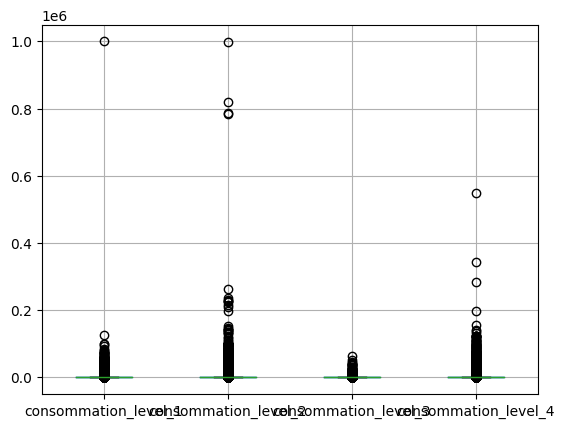

In [12]:
invoice_train.boxplot(column=['consommation_level_1','consommation_level_2','consommation_level_3','consommation_level_4'])

<Axes: >

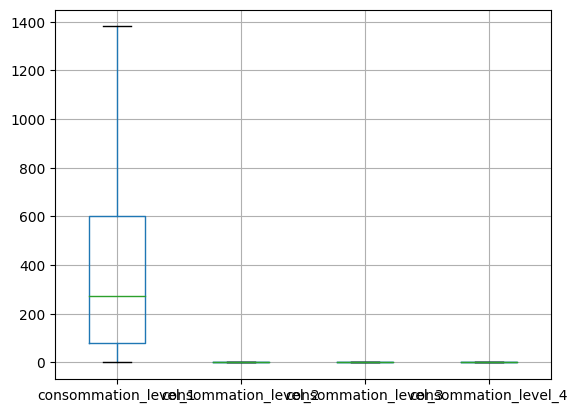

In [13]:
invoice_train.boxplot(column=['consommation_level_1','consommation_level_2','consommation_level_3','consommation_level_4'], showfliers=False)

In [14]:
is_within_range = invoice_train['consommation_level_1'].between(0, 1200)

In [16]:
is_within_range.count()

4476749

In [18]:
has_missing_values = invoice_train[['consommation_level_2', 'consommation_level_3']].isnull().any(axis=1)


In [23]:
filtered_df = invoice_train[is_within_range & has_missing_values]

filtered_df.value_counts()

Series([], Name: count, dtype: int64)

In [27]:
zero_count = (invoice_train['consommation_level_1'] == 0).sum()
print (zero_count)

467553


In [33]:
total_rows = len(invoice_train)
print(total_rows)

4476749


In [35]:
percentage = (zero_count/total_rows)*100
percentage

10.444029808238078